In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

# Domain decomposition method (DDM)

### Step1. Setup BEM subdomains

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 16(Edge) 0(Trace)
[Mesh] Number of Nodes:48(Total) 48(Edge) 0(Trace) 0(Source)


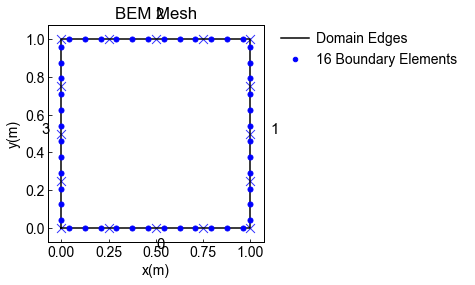

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 100), (3, 100)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 16(Edge) 0(Trace)
[Mesh] Number of Nodes:48(Total) 48(Edge) 0(Trace) 0(Source)


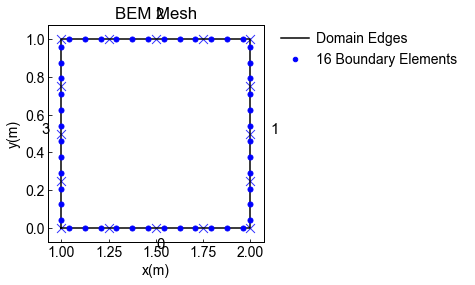

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, 10)]


In [17]:
#####Subdomain1########
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1.0/4.0

BEM_Case1.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case1.plot_Mesh()
#2.Set Boundary condition
bc0=[(0,100),(3,100)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

BEM_Case1.SetProps(k=2)

#####Subdomain2########
BEM_Case2=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (2.0, 0.0), (2.0, 1.0), (1.0, 1.0)] #Anti-clock wise for internal domain

BEM_Case2.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case2.plot_Mesh()

#2.Set Boundary condition
bc0=[(1,10)]
BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

BEM_Case2.SetProps(k=4)

BEMCases=[BEM_Case1,BEM_Case2]

### Step2. Setup iterative coupling solver

In [18]:
#Intersection 1
#Domain 0 <-> Domain 1
#BD 1 <-> BD 3
DomainID,BoundaryID=0,1
DomainID_connect,BoundaryID_connect=1,3
Intersect1=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

### Step3. Parallel Robin-Robin Algorithm

[Solution] #DOFs= 48
[Solution] #DOFs= 48
1	1.0		alpha:	0.5
2	1.4295709636167964		alpha:	0.5
3	0.8030124563730006		alpha:	1.3866927941438787
4	0.5154419583204012		alpha:	2.3504288559784885
5	0.15307117840629395		alpha:	1.7370833530873264
6	0.08843855474243514		alpha:	0.6958627589452243
7	0.04384652539183164		alpha:	0.61845410948665
8	0.0747855296663097		alpha:	1.1093585701276254
9	0.3089166938666398		alpha:	7.378725829287677
10	0.13333087195216664		alpha:	7.758488958188572
11	0.02578560642051099		alpha:	0.6816740681612913
12	0.010854692065878213		alpha:	0.5528715145217307
13	0.0048491879048653055		alpha:	0.5415227770566432
14	0.033313082048601256		alpha:	3.802453936122355
15	0.0875333154577971		alpha:	14.083001797172571
16	0.03369075167612989		alpha:	10.098991828380868
17	0.016923858209680016		alpha:	0.5957388917889285
18	0.003779016280414489		alpha:	0.5759864455356632
19	0.0008590624311921738		alpha:	0.5513114216917145
20	0.0014933949034607902		alpha:	1.1225396821788836
21	0.003154080

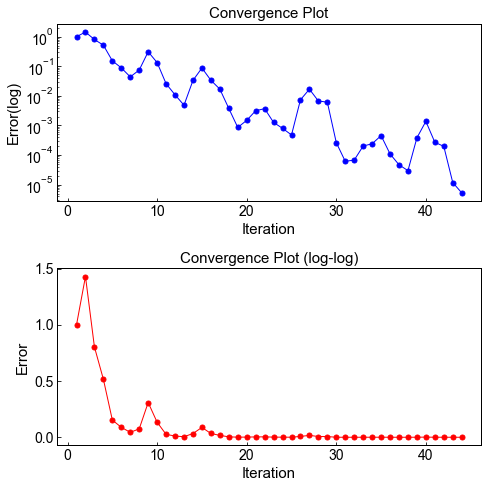

In [10]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1],plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-RR",max_iters=100,TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Parallel Neumann-Neumann Algorithm

[Solution] #DOFs= 48
[Solution] #DOFs= 48
1	1.0		alpha:	0.5
2	0.4927401648809261		alpha:	0.5
3	0.48433536404642813		alpha:	0.9797050300590089
4	0.33103891676147545		alpha:	1.0544265000146877
5	0.18260000365001422		alpha:	0.7486549842642511
6	0.08649697119127187		alpha:	0.4011172981313891
7	0.03733690559103897		alpha:	0.18285048927192624
8	0.015397177387168615		alpha:	0.07714530979732608
9	0.006224375428150612		alpha:	0.031477301333335025
10	0.002495593450284324		alpha:	0.01266768468911975
11	0.00099725146592207		alpha:	0.005069637185561968
12	0.00039797435797247213		alpha:	0.002024353350039202
13	0.00015873530183619893		alpha:	0.0008076219036582734
14	6.329936799153303e-05		alpha:	0.00032208845027395424
15	2.523993886761248e-05		alpha:	0.0001284341481552254
16	1.0063811600413032e-05		alpha:	5.1210764728043056e-05
17	4.0126457973830625e-06		alpha:	2.0418893376296738e-05
Converged at 17 Steps! TOL= 1e-05
Dirichelt [80.16899961 60.05609045 47.15406991 37.97334489 31.16065846 26.00274089
 

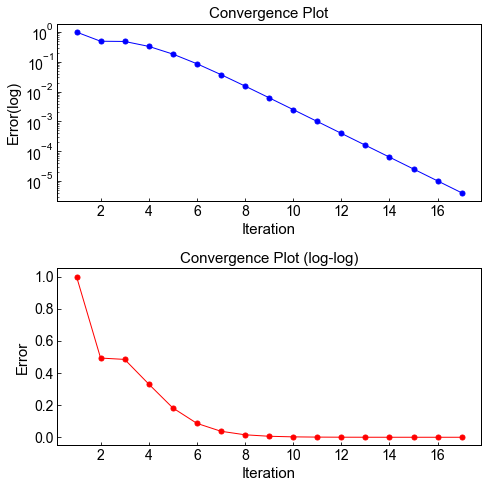

In [14]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1],plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-NN",max_iters=100,TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Parallel Dirichlet-Dirichlet Algorithm (winner)

[Solution] #DOFs= 48
[Solution] #DOFs= 48
1	1.0		alpha:	0.5
2	1.027587362699495		alpha:	0.5
3	3.1172535974149986		alpha:	0.00855388998872421
4	1.5173895807864712		alpha:	0.007609791065661239
5	0.5982456393009509		alpha:	0.006276852580673416
6	0.4293025246382563		alpha:	0.006569297142258209
7	1.102344786839305		alpha:	0.01316065238068972
8	1.1156028585330071		alpha:	0.0179129688220334
9	0.7813994163399633		alpha:	0.014215874584063502
10	0.5668009283756154		alpha:	0.0058409173875634286
11	0.1664023901487381		alpha:	0.005443049012765115
12	0.2923423521123208		alpha:	0.010723473217829228
13	1.9603467908942211		alpha:	0.04136431559892409
14	1.1280752101765983		alpha:	0.04313772376410593
15	0.6665799742312088		alpha:	0.018845520273397885
16	0.6154592720928641		alpha:	0.005593338472058709
17	0.11723742504315622		alpha:	0.005400508249037083
18	0.21568923496779713		alpha:	0.012030217889771815
19	1.061883042232184		alpha:	0.10305607729965881
20	0.3390893475725891		alpha:	0.11263572452229058
21	0

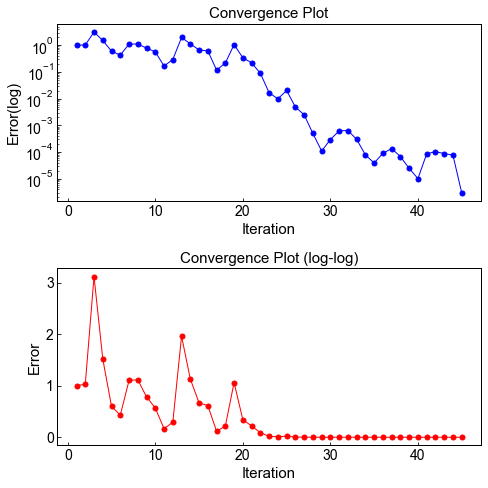

In [6]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1],plot_mesh=0)
BEMSolver.Solve_Iter(Method="P-DD",max_iters=100,TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 32
Total Number of Subdomains: 2


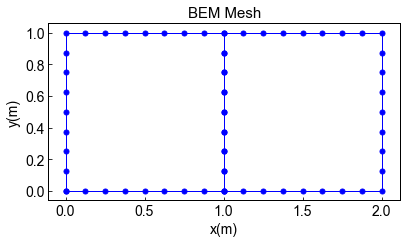

[Warnning] This method is not applicable for new input format


In [21]:
CommonEdges=[[(1.0, 0.0), (1.0, 1.0)]
            ]
Connects=[[(1,0)],  #BEM_case1 connect with BEM_case2(1) at its face 1 
          [(0,0)]] 

BEMCases=[BEM_Case1,BEM_Case2] #BEM_Case1,BEM_Case2 are coupled

BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

[Visulization] Plotting Solution


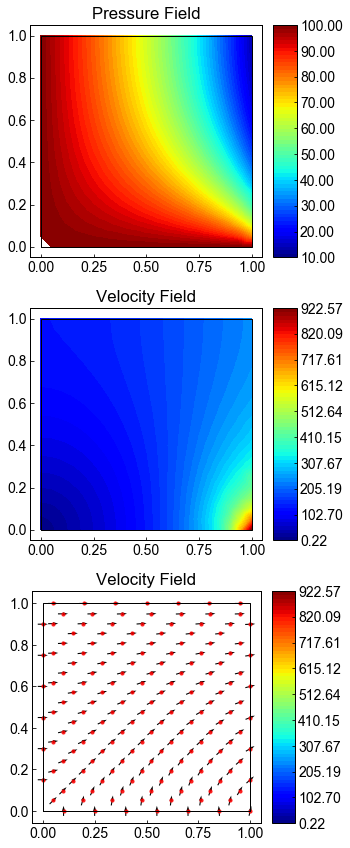

[Visulization] Plotting Solution


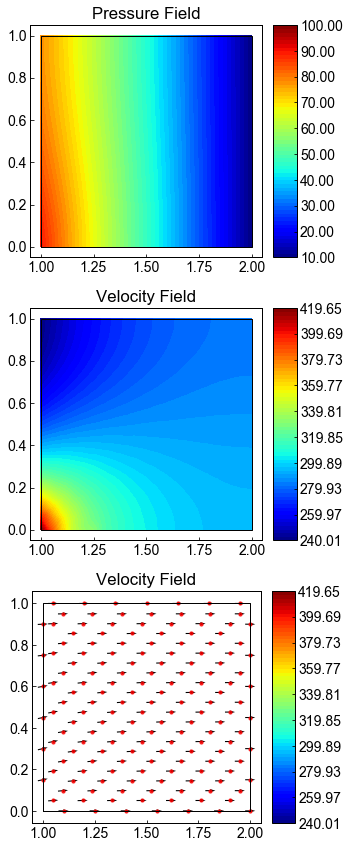

In [15]:
#Pressure and velocity contour results
PUV1=BEM_Case1.PostProcess.plot_Solution(p_range=(10,100))
PUV2=BEM_Case2.PostProcess.plot_Solution(p_range=(10,100))

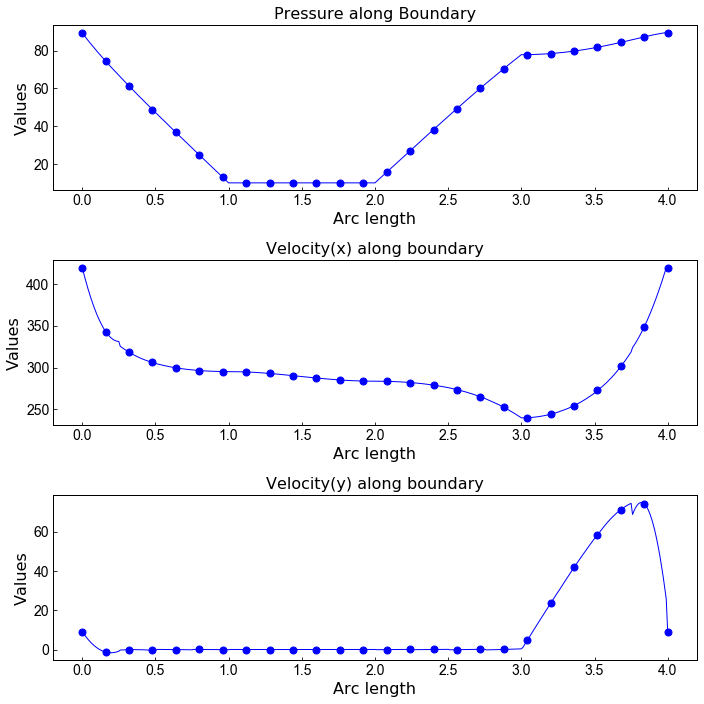

In [16]:
P=BEM_Case2.PostProcess.plot_SolutionBD()

In [ ]:
P=BEM_Case2.PostProcess.plot_SolutionBD()